<a href="https://colab.research.google.com/github/Aya11ali/NYC_Airbnb_Data_Analysis/blob/main/NYC_Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NYC Airbnb Data Analysis Project**

## **Dataset Overview**  📊
We are working with **the New York City Airbnb** dataset, which includes details about Airbnb listings across New York. The dataset contains valuable information such as neighborhood, price, room type, and availability of the listings.

Let's import the necessary libraries and load the dataset!

In [136]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("vrindakallu/new-york-dataset")
df = pd.read_csv(f'{path}/new_york_listings_2024.csv')


## **Step 1: Exploring the DataFrame  🔍**


In [137]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [139]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


## **Step 2: Data Cleaning**  🧹



In any data analysis project, it's essential to ensure that the data is clean before diving into analysis.

**Key Data Cleaning Steps to Consider:**

1.   **Missing Values**: Usually, we would handle missing values
2. **Duplicate Rows**: It's important to check for duplicates to avoid redundant data that can skew analysis.
3. **Data Types**: Another important step is to ensure that columns have the correct data types.


In [140]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [141]:
df.duplicated().sum()

np.int64(0)

In [142]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

After performing these checks, we found that the dataset is already clean and ready for analysis. This means no further data cleaning steps are necessary for now, so we can proceed directly to Exploratory Data Analysis (EDA). 🎉


## **Step 3: Exploratory Data Analysis (EDA)** 📈


Now that the dataset is cleaned, we can proceed with the exploratory data analysis (EDA). This step involves understanding the main trends, distributions, and relationships within the dataset.

###**3.1. Basic Statistical Overview**


In [143]:
relevant_columns = ['price', 'minimum_nights', 'number_of_reviews',
                    'reviews_per_month', 'calculated_host_listings_count',
                    'availability_365', 'bedrooms', 'beds', 'baths', 'rating']

df[relevant_columns].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,beds
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,1.723721
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,1.212272
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,2.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,42.000000



Now let's dive into the results of the `describe()` function and the metrics we have in front of us, to gain a better understanding of the characteristics of this dataset:

 **Price**:
- The average price of an Airbnb listing in New York City is around **\$188** per night.
- However, there’s a **wide variation** in prices, with some listings costing as low as **\$10** and some reaching extreme outliers of **\$100,000** (likely luxury or unique properties).
- The high standard deviation (**\$1022.80**) indicates that while most listings are in the lower range, a few **very high-priced listings** skew the data.

**Minimum Nights**:
- On average, hosts require a minimum stay of around **28 nights**, which is relatively high. This suggests that some listings are targeting **longer-term stays**.
- While some listings allow **1-night stays**, others require a minimum stay of **1250 nights**, indicating long-term rental options for certain properties.

**Number of Reviews**:
- The average listing has received around **43 reviews**. However, this varies significantly, with some listings having only **1 review**, while others have up to **1865 reviews**, reflecting the popularity and frequency of bookings.


 **Reviews Per Month**:
- On average, listings receive **1.26 reviews per month**, which suggests consistent booking activity.
- Some listings receive as many as **75 reviews per month**, indicating extremely high turnover and popularity.


**Host Listings**:
- On average, hosts manage **18.8 listings**, which suggests that many hosts on the platform are **professional property managers**.
- Some hosts manage only **1 listing**, typical of individual hosts, while the most active hosts manage up to **713 listings**, likely indicating commercial hosts.

**Availability (365 Days)**:
- Listings are available for an average of **206 days per year**, meaning many listings are booked or unavailable for a portion of the year.
- Some listings are available for **365 days** a year, while others are fully booked (or unavailable) for the entire year.

**Beds**:
- The average listing offers **1.72 beds**, indicating that many properties are small, likely **1-bedroom apartments or studios**. The maximum number of beds in a listing is **42**, suggesting that there are some large, group-oriented properties.


In [144]:
df=df.drop(["latitude", "longitude", "last_review", "host_name", "id", "host_id", "name"],axis=1)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,Brooklyn,Clinton Hill,Private room,55.0,30,3,0.03,1,0,0,No License,5.0,1,1,Not specified
1,Manhattan,Hell's Kitchen,Entire home/apt,144.0,30,9,0.24,139,364,2,No License,4.67,2,1,1
2,Manhattan,Chelsea,Entire home/apt,187.0,2,6,1.67,1,343,6,Exempt,4.17,1,2,1
3,Manhattan,Washington Heights,Private room,120.0,30,156,1.38,2,363,12,No License,4.64,1,1,1
4,Manhattan,Murray Hill,Entire home/apt,85.0,30,11,0.24,133,335,3,No License,4.91,Studio,1,1


##**Step 4: Data Visualization**


### What is the price distribution of AirBNB Listings

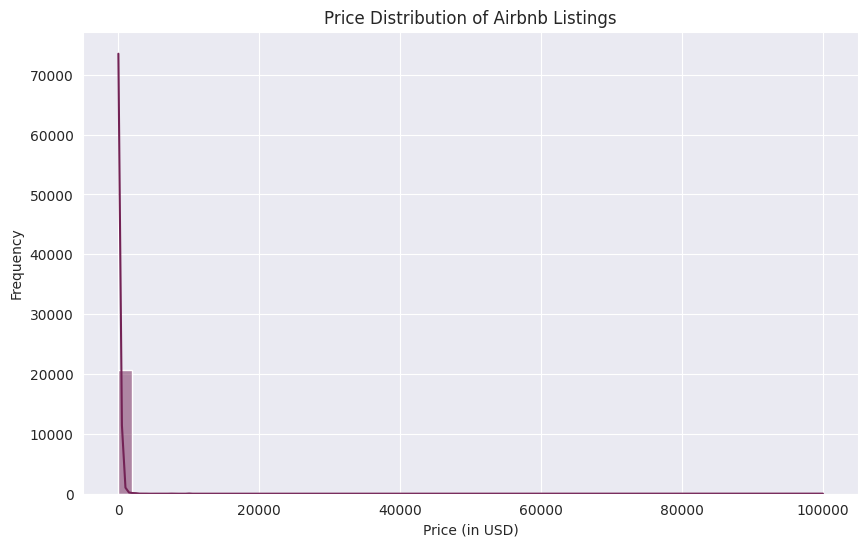

In [145]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,color="#732255",kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()

In this plot, we attempted to visualize the full distribution of Airbnb listing prices. However, we can see that the vast majority of prices are clustered near $0, while the x-axis extends all the way up to \$100,000. This is because there are some extremely high-priced listings (outliers) that skew the distribution and compress the visual representation of most listings. As a result, the bulk of listings, which are priced much lower, are squeezed into a very narrow section of the plot, making it difficult to see meaningful trends.

To solve this, we will apply a price cap and only consider listings with prices up to \$1000 to get a clearer view of the price distribution for the majority of listings.



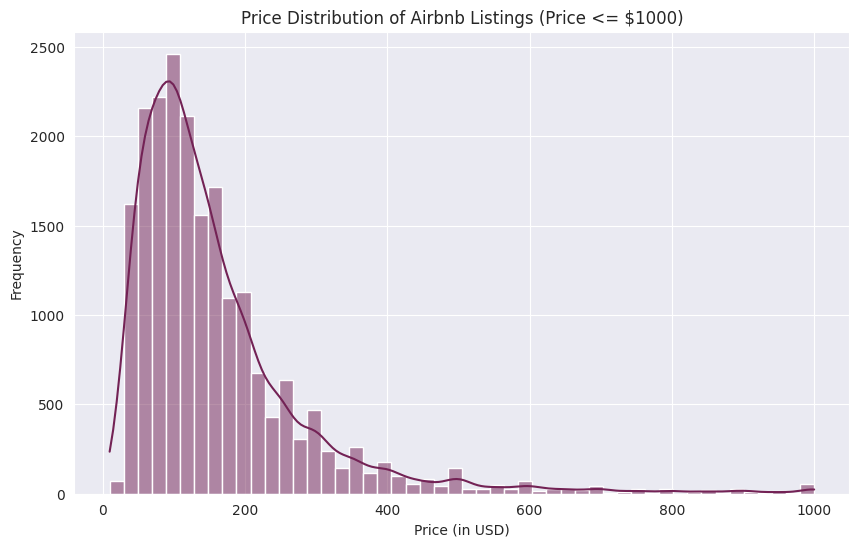

In [146]:
df = df[df['price'] <= 1000]

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='#732255')
plt.title('Price Distribution of Airbnb Listings (Price <= $1000)')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()


In this second plot, we restricted the dataset to only include listings priced at \$1000 or below, which represents the vast majority of listings. As a result, we can now see a more detailed distribution:

Most listings fall within the \$50 to \$300 range, with a peak around \$150 per night.
The distribution is right-skewed, meaning that while there are many affordable listings, a small number of higher-priced listings are still present.
This plot gives a much clearer view of the typical prices for Airbnb listings in New York City, without the distortion caused by a few extreme outliers.


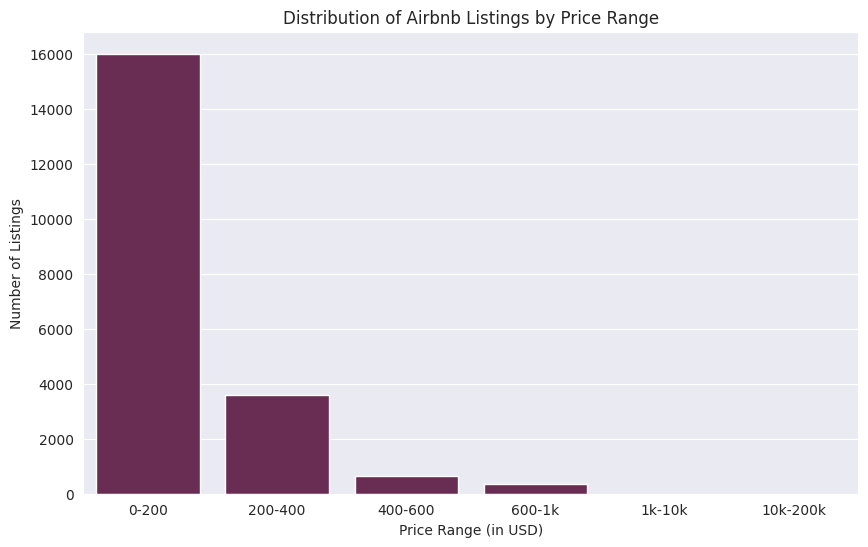

In [147]:
bins = [0, 200, 400, 600, 1000, 10000,200000]

bin_labels = ['0-200', '200-400', '400-600', '600-1k', '1k-10k','10k-200k']

df['price_bin'] = pd.cut(df['price'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(x='price_bin', data=df, color='#732255')
plt.title('Distribution of Airbnb Listings by Price Range')
plt.xlabel('Price Range (in USD)')
plt.ylabel('Number of Listings')
plt.show()

We can notice that the majority of Airbnb listings fall within the **\$0-200**  price range, with a significant portion of listings also priced between **\$200-400**. There are fewer listings in the **\$400-600**  range, and the number of listings dramatically decreases beyond **\$600** .

Only a small number of listings are priced above **\$1,000** , and extremely high-priced listings (e.g., above **\$10,000** ) represent a very small fraction of the data. These outliers can distort visualizations and make it difficult to focus on the majority of listings, which are priced at more typical levels.

To improve clarity in our analysis moving forward, we will address these outliers by applying a price cap and filter on our data, allowing us to focus on the majority of Airbnb listings.


In [148]:
df = df[df['price'] <= 10000]

### How are AirBNB rentals distributed among the five boroughs of New York?

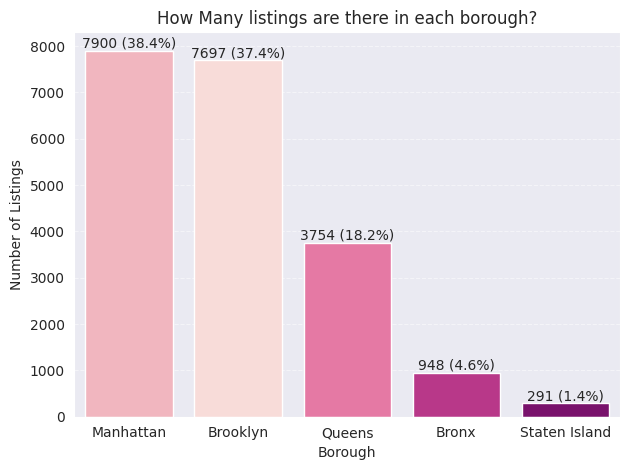

In [149]:
sorted_order = df['neighbourhood_group'].value_counts().index

total = len(df)

plot = sns.countplot(
    data=df,
    x='neighbourhood_group',
    hue='neighbourhood_group',
    order=sorted_order,
    palette='RdPu',
    legend=False
)

for p in plot.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    label = f"{count} ({percent:.1f}%)"
    plot.annotate(label, (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom')

plt.title('How Many listings are there in each borough?')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This bar chart displays the proportion of listings in each burough. We can see that Manhattan contains 38% of all NYC AirBNB listings while Staten Island only contains 1% of all the listings. We can see that the majority of this dataset is consumed of listings located in Manhattan and Brooklyn making up 76% of all data in this dataset.

### What is the average price of an AirBNB in each Borough

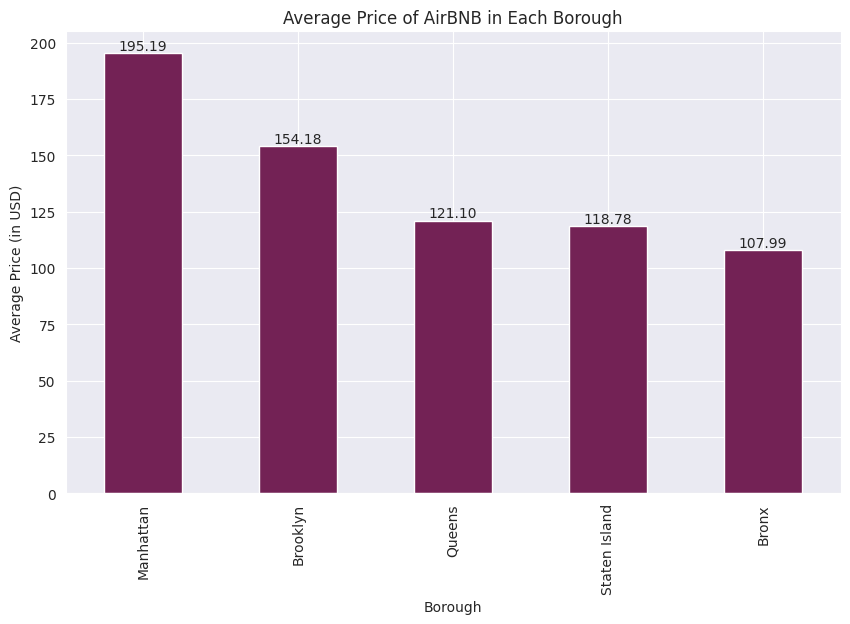

In [150]:
average_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))

plot = average_price_neighbourhood.plot(kind='bar', color='#732255')
for p in plot.patches:
  avg = float(p.get_height())
  plt.annotate(f'{avg:.2f}', (p.get_x() + p.get_width() / 2, avg), ha='center', va='bottom')

plt.title('Average Price of AirBNB in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price (in USD)')
plt.show()


This bar chart displays the average price of an AirBNB listing in each borough.

 Manhattan averages the highest prices at 227/night while Bronx and Staten Island average the lowest prices at 118/night.

###Price Distribution by Room Type



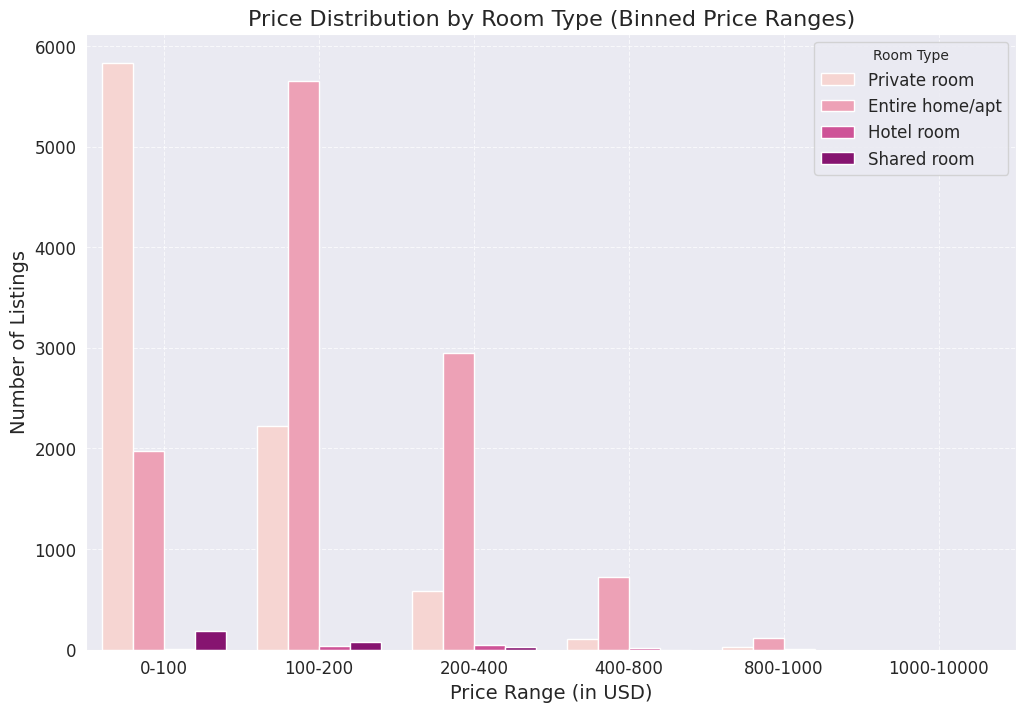

In [151]:
bins = [0, 100, 200, 400, 800, 1000,10000]
bin_labels = ['0-100', '100-200', '200-400', '400-800', '800-1000','1000-10000']

df['price_bin'] = pd.cut(df['price'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(12,8))
sns.countplot(x='price_bin', hue='room_type', data=df, palette='RdPu')

plt.title('Price Distribution by Room Type (Binned Price Ranges)', fontsize=16)
plt.xlabel('Price Range (in USD)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Room Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


The majority of Airbnb listings are concentrated in the lower price ranges, particularly for **private rooms** and **entire homes/appartments**. This reinforces the notion that Airbnb is largely a platform for more affordable, short-term stays. As prices increase, the number of listings decreases significantly, with only a few high-end listings surpassing **$1000 USD**.

### Differentiate prices among available room types.

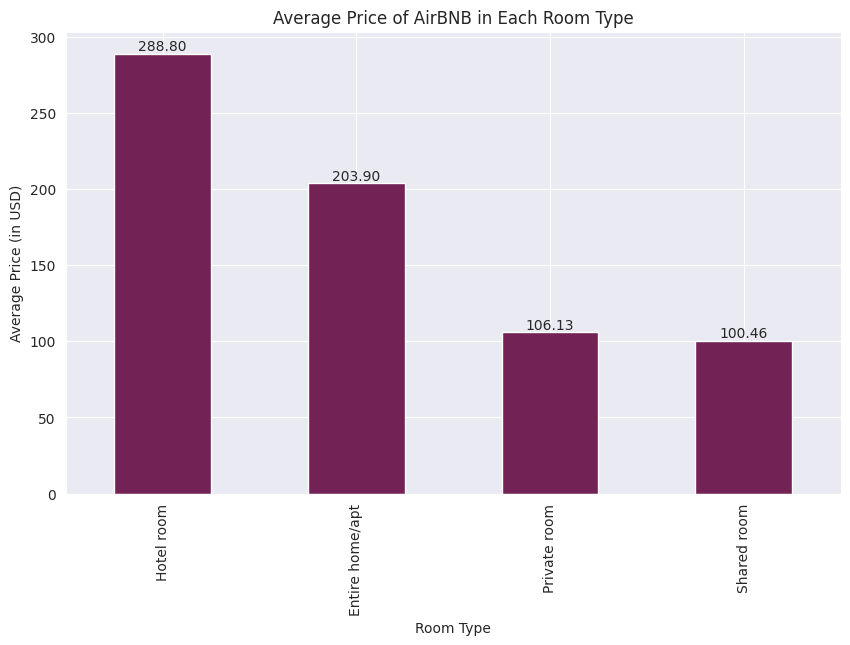

In [152]:
room_avg_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))

plot = room_avg_price.plot(kind='bar', color='#732255')
for p in plot.patches:
  avg = float(p.get_height())
  plt.annotate(f'{avg:.2f}', (p.get_x() + p.get_width() / 2, avg), ha='center', va='bottom')

plt.title('Average Price of AirBNB in Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (in USD)')
plt.show()

This bar chart shows the average price per room type available on AirBnB. As shown, the average price of renting an entire Hotel room per night costs the most at 415 Dollars while the private room per night costs 139 Dollars and the shared room per night costs 156 Dollars on average.

### Relationship Between Price and Number of Reviews



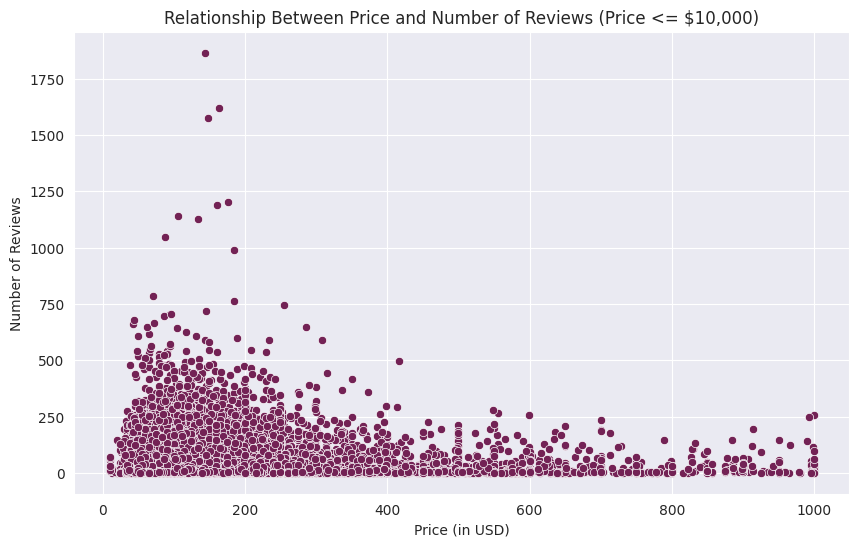

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='number_of_reviews', data=df, color='#732255')
plt.title('Relationship Between Price and Number of Reviews (Price <= $10,000)')
plt.xlabel('Price (in USD)')
plt.ylabel('Number of Reviews')
plt.show()

The scatter plot shows that:

- **Lower-priced listings** (below $1,000 USD) tend to have more reviews, with many reaching over 500 reviews. This suggests that affordable listings are booked more often, leading to more reviews.

- **Higher-priced listings** (above $2,000 USD) generally have fewer reviews, indicating that luxury or high-cost properties are booked less frequently, possibly catering to a more selective audience.

Which means : There is an **inverse relationship** between **price** and the number of **reviews**: cheaper listings get more reviews, while expensive listings tend to have fewer.



###Average Price of Airbnb Listings by Neighborhood Group



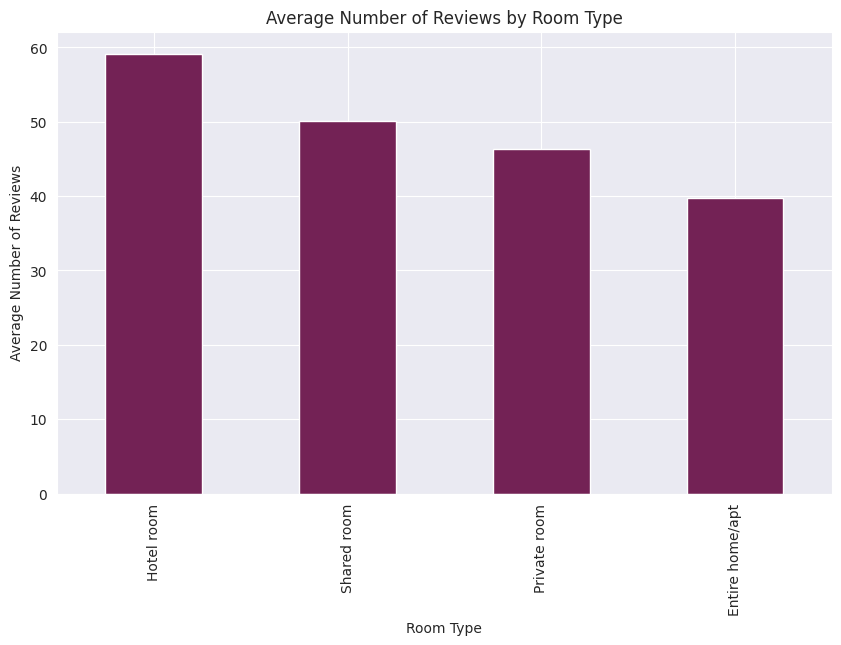

In [154]:
average_reviews_by_room_type = df.groupby('room_type')['number_of_reviews'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_reviews_by_room_type.plot(kind='bar', color='#732255')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()

### Number of Bedrooms vs Price

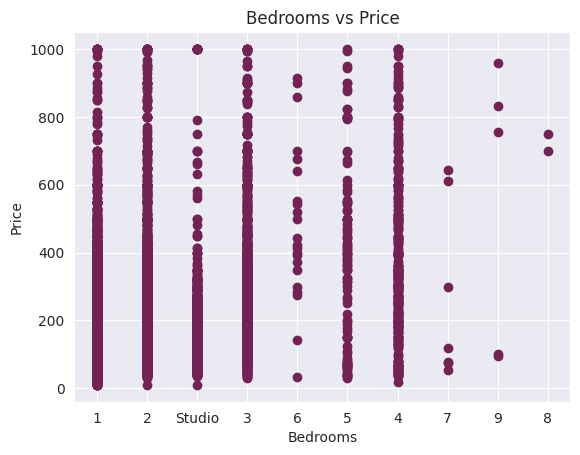

In [155]:
plt.scatter(df['bedrooms'], df['price'], color='#732255')
plt.title('Bedrooms vs Price')
plt.ylabel('Price')
plt.xlabel('Bedrooms')
plt.show()